# PREDICTION OF SEPSIS IN ICU PATIENTS
The CRISP-DM (Cross Industry Standard Process for Data Mining) framework is a robust methodology for carrying out data mining projects. It is comprised of six major phases: Business Understanding, Data Understanding, Data Preparation, Modeling, Evaluation, and Deployment. 


# 1. Business Understanding

## Objective:
To predict whether a patient in the ICU will develop sepsis based on various medical attributes. Sepsis is a serious medical condition, and early prediction can significantly improve patient outcomes by enabling timely intervention and treatment.

## Business Goals:
1. **Improve Patient Outcomes**: By predicting the likelihood of sepsis, medical staff can take preventive measures to treat patients more effectively and reduce mortality rates.
2. **Optimize Resource Allocation**: Early prediction of sepsis can help in better allocation of medical resources, ensuring that high-risk patients receive immediate attention.
3. **Cost Reduction**: Preventing sepsis can significantly reduce healthcare costs associated with prolonged ICU stays, complex treatments, and post-sepsis complications.

## Key Questions:
1. What are the primary medical attributes that contribute to the development of sepsis?
2. How accurately can we predict sepsis in ICU patients using the given dataset?
3. What is the impact of missing values on the prediction model, and how can they be handled?

## Success Criteria:
1. **Model Accuracy**: The predictive model should achieve a high accuracy, sensitivity, and specificity in predicting sepsis.
2. **Timely Predictions**: Predictions should be made early enough to allow for effective intervention.
3. **Practical Implementation**: The model should be easy to integrate into existing hospital systems and workflows.



# 2. Data Understanding

## Initial Data Collection:
The dataset consists of several attributes related to patient health metrics and demographics. Each patient has a unique ID, and the target variable is whether the patient develops sepsis (Sepsis).

## Data Description:
To determine which of these factors cannot help identify if a patient will develop sepsis, it's essential to understand what sepsis is and what factors commonly contribute to its diagnosis. Sepsis is a life-threatening condition that arises when the body's response to an infection causes injury to its own tissues and organs. Factors that typically help identify the risk of developing sepsis include vital signs (such as blood pressure and heart rate), laboratory results indicating infection or organ dysfunction, and patient demographics or medical history.

Here's a brief analysis of each factor listed:

- **ID:** Unique identifier for each patient (administrative use, not clinical).
- **PRG:** Plasma glucose levels (can be related to metabolic stress but not directly indicative of sepsis).
- **PL:** Blood Work Result-1 (without specific details, it's unclear if this is relevant).
- **PR:** Blood Pressure (critical for identifying septic shock, a severe sepsis condition).
- **SK:** Blood Work Result-2 (without specific details, it's unclear if this is relevant).
- **TS:** Blood Work Result-3 (without specific details, it's unclear if this is relevant).
- **M11:** Body mass index (BMI) (can indicate general health but not directly indicative of sepsis).
- **BD2:** Blood Work Result-4 (without specific details, it's unclear if this is relevant).
- **Age:** Age of the patient (older age can be a risk factor for sepsis).
- **Insurance:** Indicator if the patient holds a valid insurance card (administrative use, not clinical).

From this list, the factors that cannot help identify if a patient will develop sepsis or not are primarily administrative or not directly related to clinical indicators of infection and organ dysfunction:

- **ID**: Unique identifier for each patient.
- **Insurance**: Indicator if the patient holds a valid insurance card.
- **M11**: Body mass index (BMI).

While BMI and age can influence overall health, they are not direct indicators for the diagnosis of sepsis. The unique identifier (ID) and insurance status are entirely administrative and do not contribute to clinical decision-making regarding sepsis.

## Data Quality:
- **Missing Values**: Yes, there are missing attribute values. These need to be identified and handled appropriately during the data preparation phase.

### Next Steps:
1. **Data Preparation**:
   - Handle missing values through imputation or removal.
   - Normalize or standardize the data if necessary.
   - Encode categorical variables (if any).

2. **Exploratory Data Analysis (EDA)**:
   - **Data Visualization**:
     - Plot histograms and density plots for numerical attributes to understand their distributions.
     - Create box plots to identify outliers and understand the spread of the data.
     - Use bar charts for categorical attributes (e.g., Insurance).
   - **Correlation Analysis**:
     - Compute the correlation matrix to identify relationships between numerical attributes.
     - Use heatmaps to visualize the correlations.
   - **Target Variable Analysis**:
     - Analyze the distribution of the target variable (Sepsis).
     - Compare the distributions of numerical attributes for different target variable classes (e.g., Positive vs. Negative).
   - **Missing Data Analysis**:
     - Identify the percentage of missing values in each attribute.
     - Visualize missing data patterns using heatmaps or bar plots.
   - **Feature Engineering**:
     - Create new features if necessary, based on domain knowledge or patterns identified during EDA.
     - Consider interactions between features that might improve model performance.

3. **Modeling**:
   - **Feature Engineering**:
     - Create new features if necessary, based on domain knowledge or patterns identified during EDA.
     - Consider interactions between features that might improve model performance.
   - Select appropriate predictive modeling techniques (e.g., logistic regression, decision trees, random forest, etc.).
   - Train and test models using cross-validation.

4. **Evaluation**:
   - Assess model performance using metrics like accuracy, sensitivity, specificity, precision, and recall.
   - Compare different models to select the best-performing one.

5. **Deployment**:
   - Integrate the predictive model into the API.
   - Monitor the model's performance over time and update it as necessary.



### Import necessary libraries and packages

In [83]:
# System Libraries
import os
import sys

# Add the src directory to the notebook path
src_path = os.path.abspath(os.path.join('..', 'api'))
sys.path.append(src_path)


# Data Manipulation Libraries
import pandas as pd
import numpy as np

# Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import phik
from phik.report import plot_correlation_matrix
from phik import report
from sklearn.decomposition import PCA

# Statistics libraries
from scipy.stats import spearmanr


# Machine Learning Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler,LabelEncoder,FunctionTransformer,StandardScaler,OneHotEncoder
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.feature_selection import SelectKBest,mutual_info_classif
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.model_selection import RandomizedSearchCV
from feature_transformer import FeatureEngineeringTransformer
from scipy.stats import chi2_contingency

# Metrics libraries
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,auc


# Utility libraries
import warnings
import joblib
warnings.filterwarnings("ignore")

# Define custom color palette
custom_palette = {"Positive":"Blue","Negative":"Orange"}

## Exploratory Data Analysis

In [84]:
train_df= pd.read_csv("../datasets/Paitients_Files_Train.csv")
train_df.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive


In [85]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         599 non-null    object 
 1   PRG        599 non-null    int64  
 2   PL         599 non-null    int64  
 3   PR         599 non-null    int64  
 4   SK         599 non-null    int64  
 5   TS         599 non-null    int64  
 6   M11        599 non-null    float64
 7   BD2        599 non-null    float64
 8   Age        599 non-null    int64  
 9   Insurance  599 non-null    int64  
 10  Sepssis    599 non-null    object 
dtypes: float64(2), int64(7), object(2)
memory usage: 51.6+ KB


**ID**: Represents an identifier (likely a unique identifier for each record).
**PRG, PL, PR, SK, TS**: These columns seem to be numerical features.
**M11, BD2**: These columns are float64 data types, possibly representing some measurements or scores.
**Age**: Indicates the age of the individuals in the dataset.
**Insurance**: Binary variable (0 or 1) indicating whether an individual has insurance.
**Sepssis**: An object (string) column, which might contain categorical information related to sepsis.

There are no missing values

In [86]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
PRG,599.0,3.824708,3.362839,0.000,1.000,3.000,6.000,17.00
PL,599.0,120.153589,32.682364,0.000,99.000,116.000,140.000,198.00
PR,599.0,68.732888,19.335675,0.000,64.000,70.000,80.000,122.00
SK,599.0,20.562604,16.017622,0.000,0.000,23.000,32.000,99.00
TS,599.0,79.460768,116.576176,0.000,0.000,36.000,123.500,846.00
M11,599.0,31.920033,8.008227,0.000,27.100,32.000,36.550,67.10
BD2,599.0,0.481187,0.337552,0.078,0.248,0.383,0.647,2.42
Age,599.0,33.290484,11.828446,21.000,24.000,29.000,40.000,81.00
Insurance,599.0,0.686144,0.464447,0.000,0.000,1.000,1.000,1.00


In [87]:
train_df.shape

(599, 11)

In [88]:
train_df.isna().sum().sum()

np.int64(0)

### Hypotheses Testing

In [89]:
# Prepare the data: create a contingency table
contingency_table = pd.crosstab(train_df['Insurance'], train_df['Sepssis'])

# Perform the chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
expected




Chi-square statistic: 2.0712782081677066
P-value: 0.1500956791860619
Degrees of freedom: 1
Expected frequencies:


array([[122.71786311,  65.28213689],
       [268.28213689, 142.71786311]])

In [90]:
# Interpret the p-value
alpha = 0.01  # Significance level
if p < alpha:
    print("Reject the null hypothesis. There is an association between having insurance and the occurrence of sepsis.")
else:
    print("Fail to reject the null hypothesis. There is no association between having insurance and the occurrence of sepsis.")

Fail to reject the null hypothesis. There is no association between having insurance and the occurrence of sepsis.


### Univariate Analysis

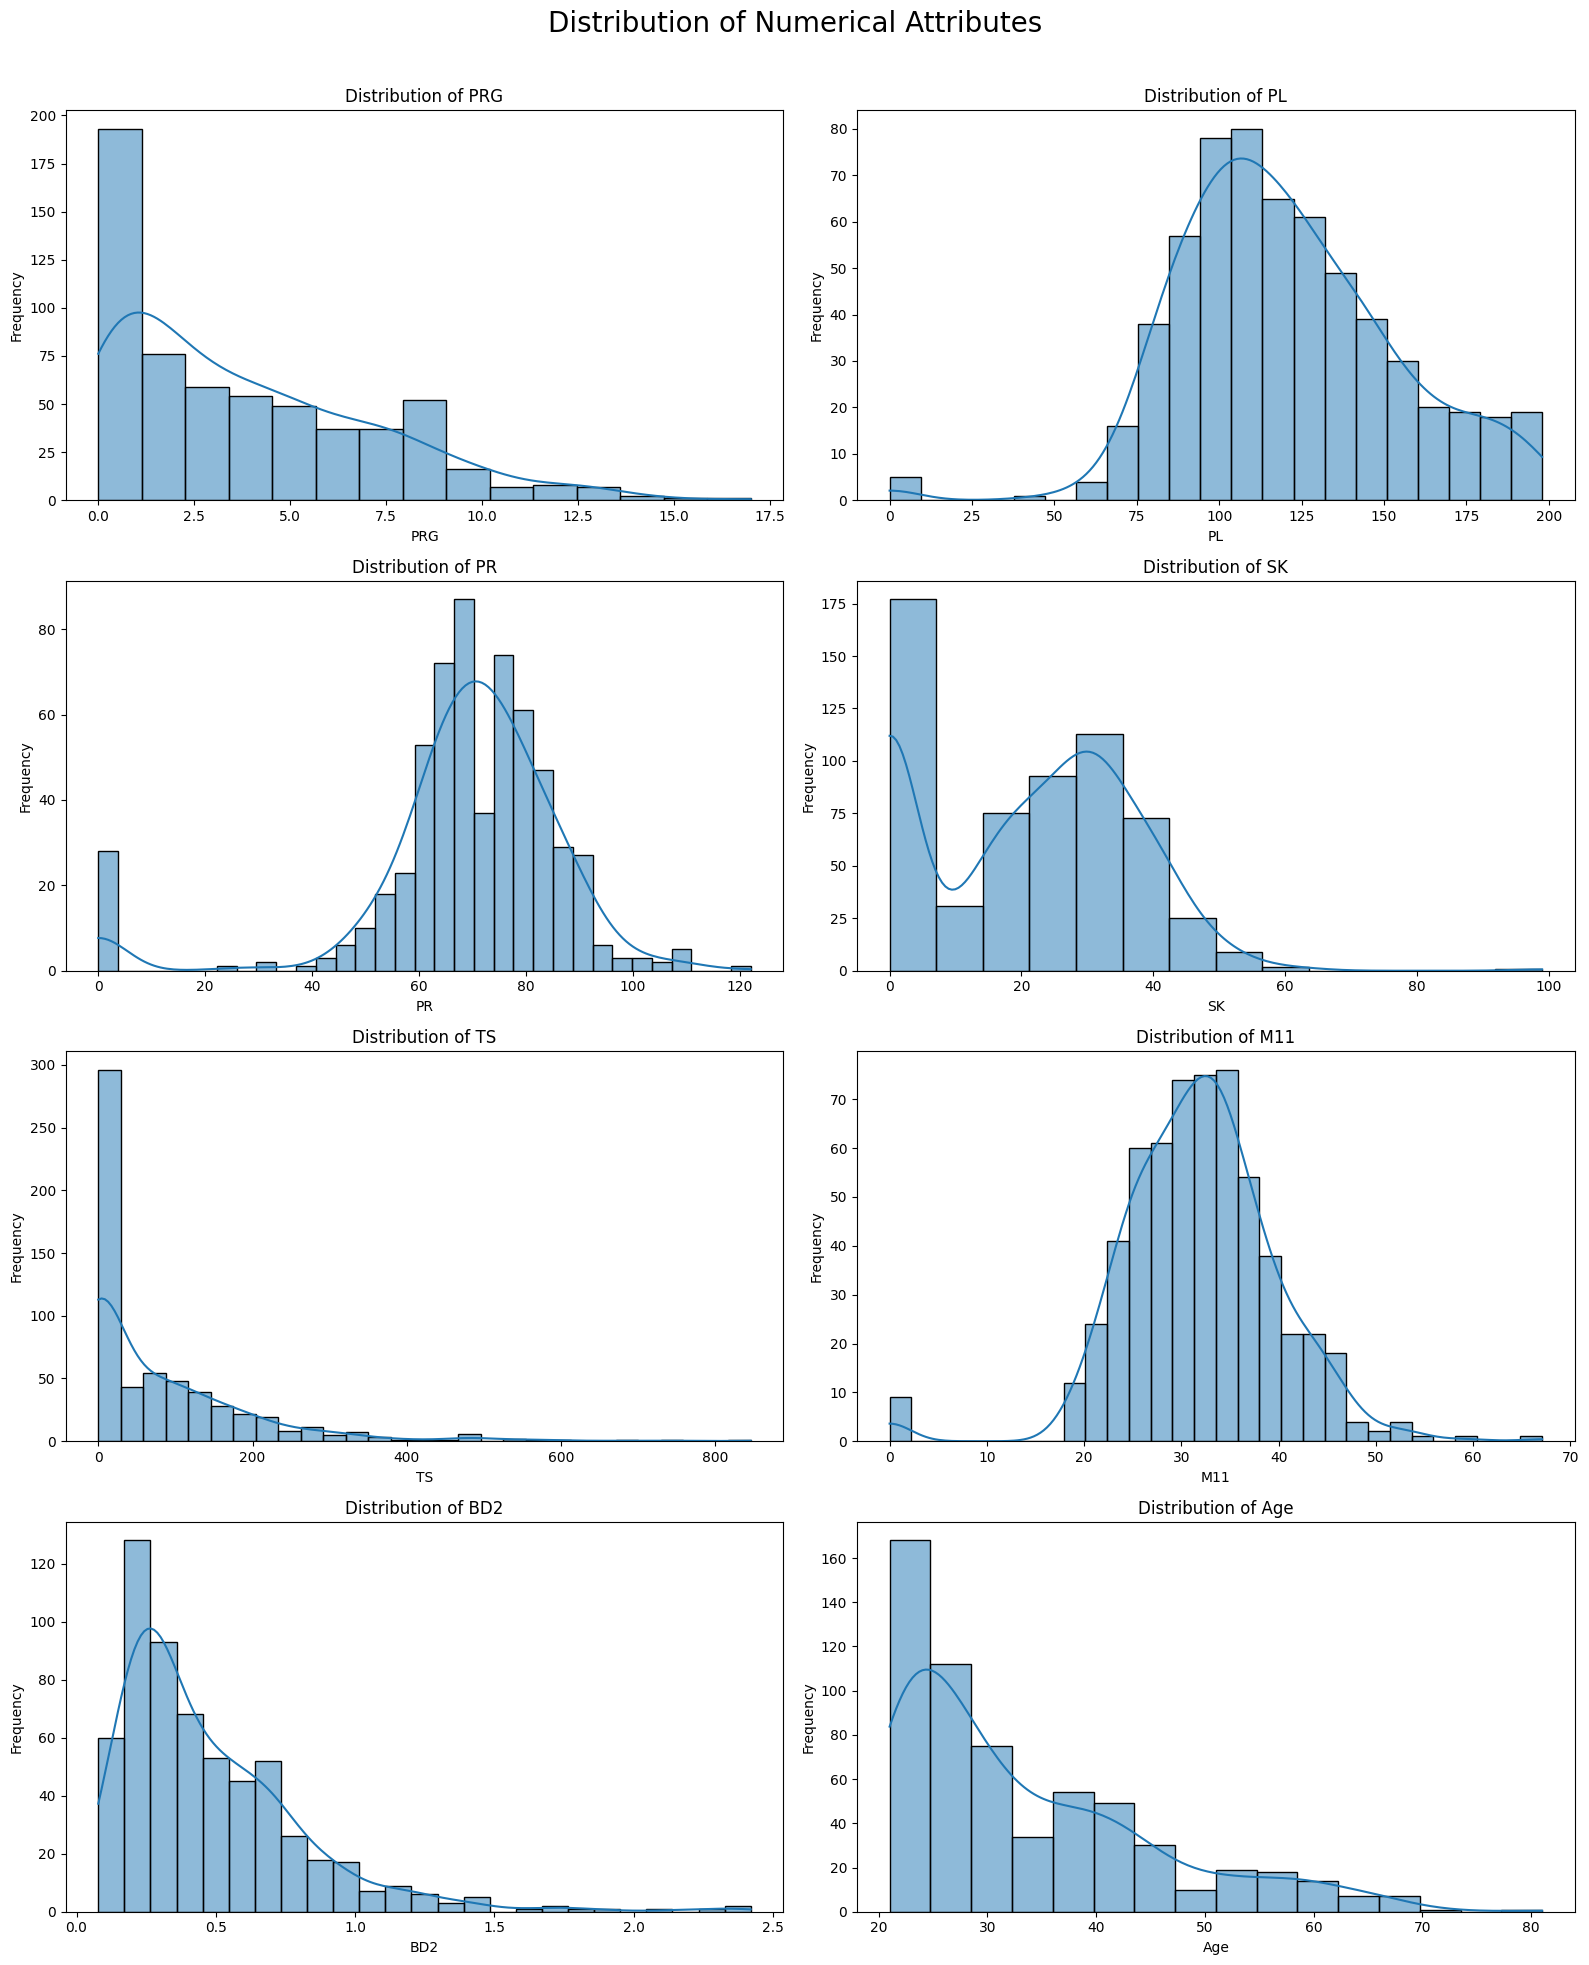

In [91]:
# Distribution of numerical attributes
numerical_columns = ['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age']

# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(16, 20))
fig.suptitle('Distribution of Numerical Attributes', fontsize=20)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot histograms for each numerical attribute
for i, column in enumerate(numerical_columns):
    sns.histplot(train_df[column].dropna(), kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Adjust the layout
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

The distributions of the numerical attributes can provide insights into the characteristics of the patient population and the nature of the variables. Here are some deductions based on the histograms and density plots:

1. **PRG (Plasma glucose levels)**:
   - The distribution is heavily right-skewed, with most values concentrated at the lower end. This suggests that most patients have lower plasma glucose levels, with a few having higher levels.

2. **PL (Blood Work Result-1)**:
   - This distribution appears to be approximately normal, centered around 100. This indicates that the majority of the patients have PL values around this range, with fewer patients having very low or very high values.

3. **PR (Blood Pressure)**:
   - This distribution is slightly right-skewed and appears roughly normal. Most patients have blood pressure values around 60-80, with fewer patients having much higher or lower values. 

4. **SK (Blood Work Result-2)**:
   - The distribution is right-skewed with most values clustering near the lower end. This indicates that most patients have lower SK values, with a few having higher values.

5. **TS (Blood Work Result-3)**:
   - This distribution is heavily right-skewed, with a large number of patients having very low TS values and fewer patients having higher values.

6. **M11 (Body Mass Index, BMI)**:
   - The distribution appears approximately normal, centered around 30. This suggests that most patients have BMI values around this range, indicating a general trend towards overweight or obese categories.

7. **BD2 (Blood Work Result-4)**:
   - The distribution is right-skewed, indicating that most patients have lower BD2 values, with a few having higher values.

8. **Age**:
   - The distribution is right-skewed, with most patients being younger (20-40 years old), and fewer patients being older.

### General Observations:
- **Right-Skewed Distributions**: Many attributes like PRG, SK, TS, BD2, and Age show right-skewed distributions, indicating that a majority of the patients have lower values for these attributes.
- **Normal Distributions**: PL, PR, and M11 appear more normally distributed, suggesting that these values are more evenly spread around their mean.
- **Patient Demographics**: The age distribution indicates a younger patient population with a smaller proportion of older patients.

These insights can help in understanding the patient demographics and the distribution of key health indicators in the dataset. 

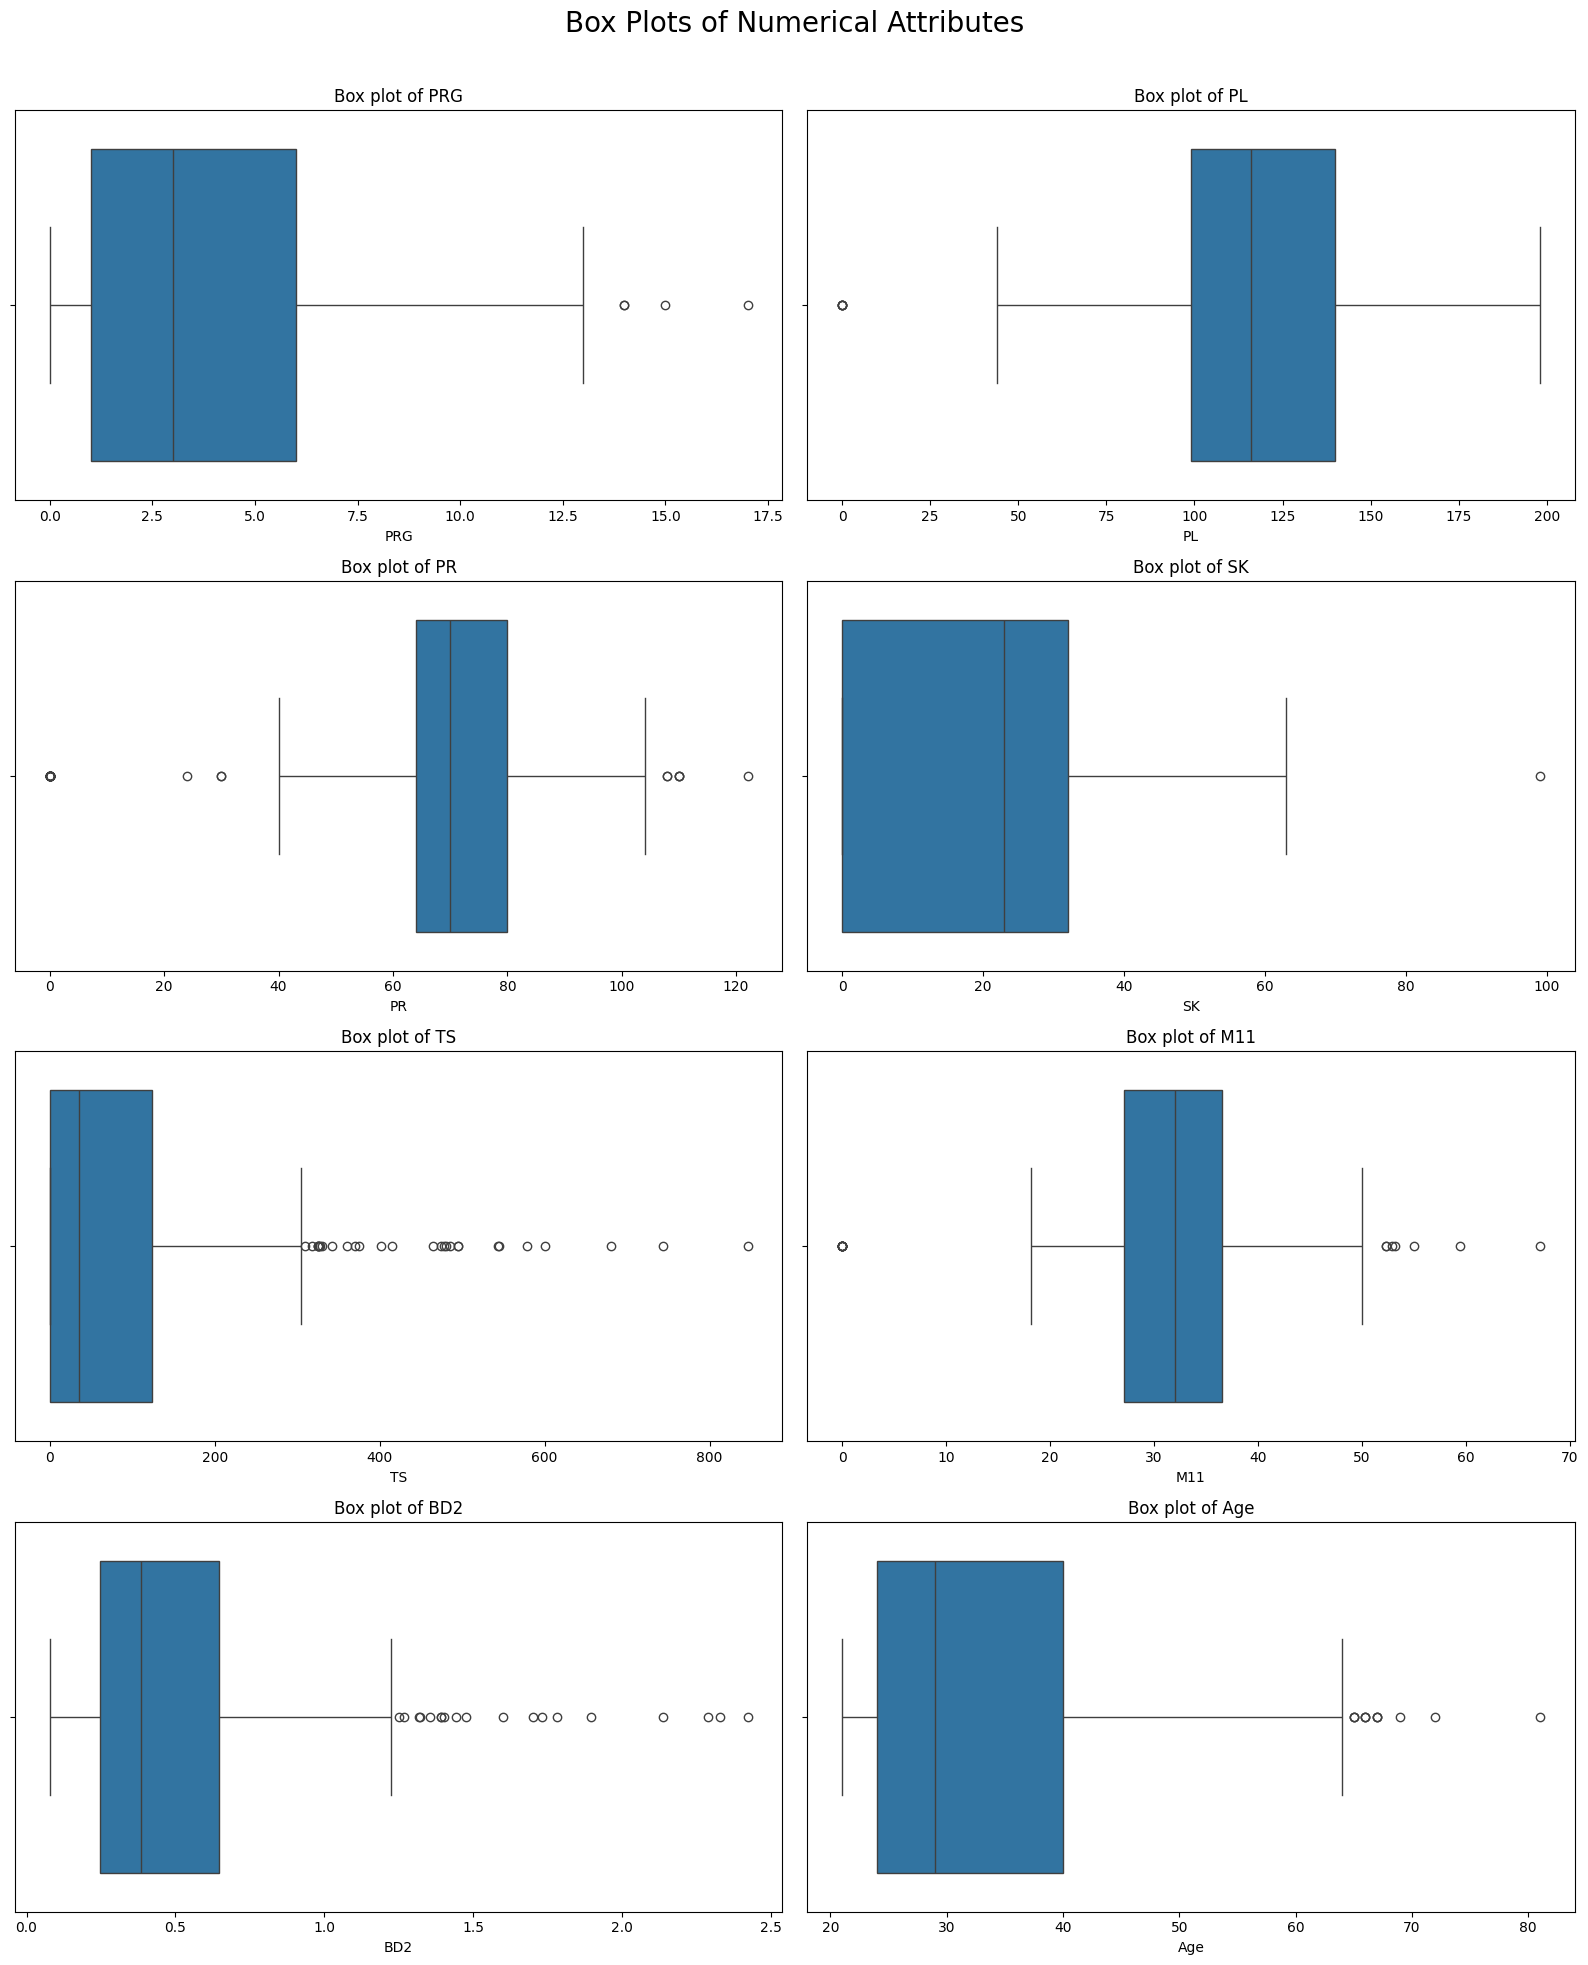

In [92]:
# Box plots to identify outliers
# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(16, 20))
fig.suptitle('Box Plots of Numerical Attributes', fontsize=20)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot box plots for each numerical attribute
for i, column in enumerate(numerical_columns):
    sns.boxplot(x=train_df[column], ax=axes[i])
    axes[i].set_title(f'Box plot of {column}')
    axes[i].set_xlabel(column)

# Adjust the layout
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

The box plots of the numerical attributes provide a clear visualization of the central tendency, dispersion, and presence of outliers for each attribute. Here are some key deductions from the box plots:

1. **PRG (Plasma glucose levels)**:
   - The box plot shows a median value around 3-4.
   - There are several outliers on the higher end, indicating some patients have significantly higher plasma glucose levels compared to the rest.

2. **PL (Blood Work Result-1)**:
   - The median value is around 100, with the interquartile range (IQR) spanning approximately 75 to 125.
   - There are outliers on both the lower and higher ends, but relatively few.

3. **PR (Blood Pressure)**:
   - The median value is around 70.
   - There are outliers on both the lower and higher ends, indicating variability in blood pressure among the patients.

4. **SK (Blood Work Result-2)**:
   - The median value is around 20.
   - There are some significant outliers on the higher end, indicating a few patients have much higher SK values.

5. **TS (Blood Work Result-3)**:
   - The median value is low, around 0-50, with the IQR stretching from 0 to 100.
   - There are numerous outliers on the higher end, indicating a large variance in TS values among patients.

6. **M11 (Body Mass Index, BMI)**:
   - The median value is around 30, with the IQR spanning approximately 25 to 35.
   - There are a few outliers on the higher end, indicating some patients have much higher BMI values.

7. **BD2 (Blood Work Result-4)**:
   - The median value is around 0.5.
   - There are several outliers on the higher end, indicating some patients have higher BD2 values.

8. **Age**:
   - The median age is around 30, with the IQR stretching from 25 to 40.
   - There are several outliers on the higher end, indicating some older patients.

### General Observations:
- **Presence of Outliers**: Many attributes exhibit outliers, particularly TS, PRG, and SK. This indicates variability and the presence of extreme values within these attributes.
- **Central Tendencies**: The median values provide a central point for the distributions:
  - PRG: ~3-4
  - PL: ~100
  - PR: ~70
  - SK: ~20
  - TS: ~0-50
  - M11: ~30
  - BD2: ~0.5
  - Age: ~30
- **Interquartile Ranges (IQR)**: The spread of the middle 50% of the data shows variability in the attributes, with some like TS and SK having larger IQRs, indicating higher variability.

These box plots highlight the distribution and spread of the numerical attributes, providing a summary of the central tendency, variability, and presence of outliers in the dataset.

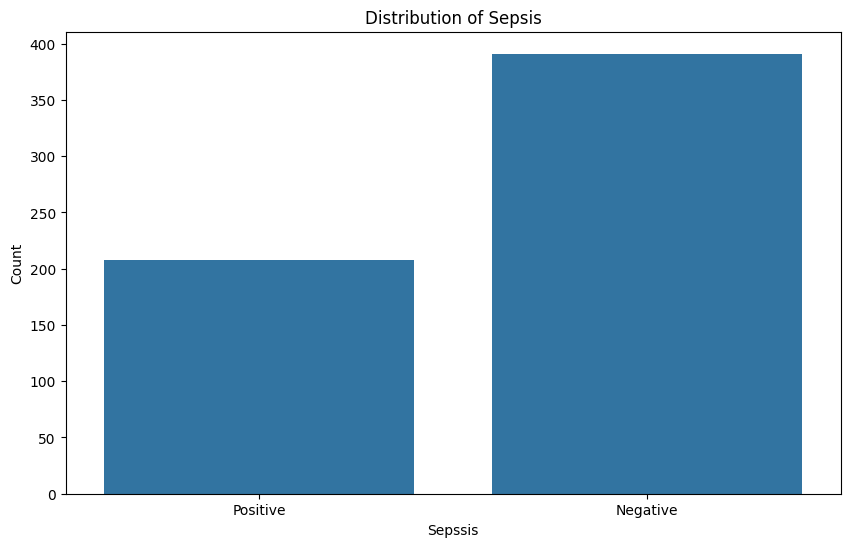

In [93]:
# Target variable analysis
# Distribution of the target variable (Sepsis)
plt.figure(figsize=(10, 6))
sns.countplot(x='Sepssis', data=train_df)
plt.title('Distribution of Sepsis')
plt.xlabel('Sepssis')
plt.ylabel('Count')
plt.show()

The bar plot shows the distribution of sepsis cases (Positive and Negative) in the dataset. Here are some key deductions from this plot:

1. **Class Distribution**:
   - There are more Negative cases than Positive cases in the dataset.
   - The count of Negative cases is approximately 400, while the count of Positive cases is around 200.

2. **Imbalance**:
   - The dataset is imbalanced, with about twice as many Negative cases as Positive cases. This could have implications for any machine learning models trained on this data, as class imbalance can affect model performance and may require techniques such as resampling or class weighting.

3. **Prevalence of Sepsis**:
   - The plot indicates that sepsis is present in the patient population but is less common compared to the absence of sepsis. 



### Bivariate Analysis

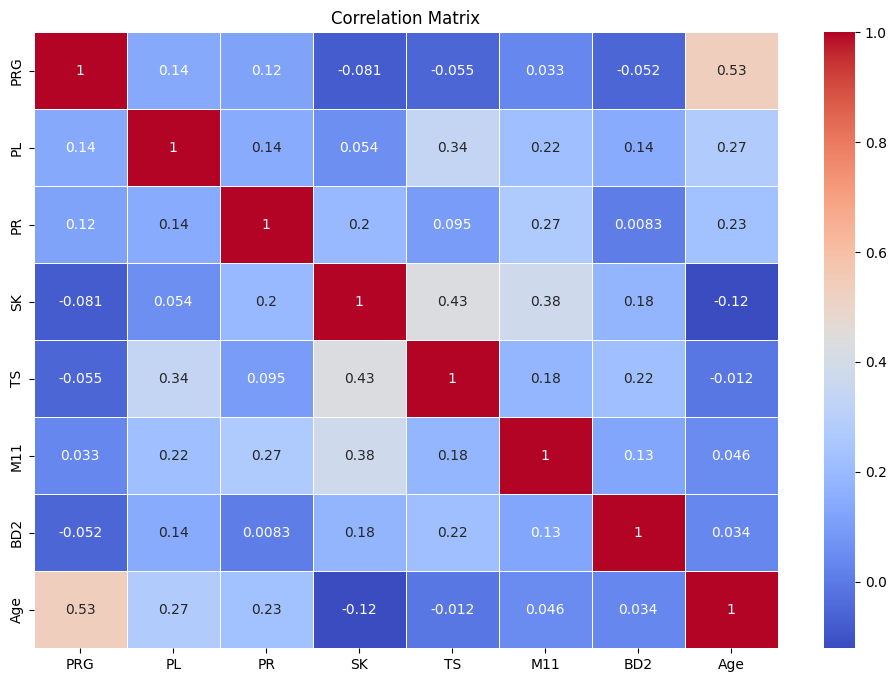

In [94]:
# Correlation matrix and heatmap
correlation_matrix = train_df[numerical_columns].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

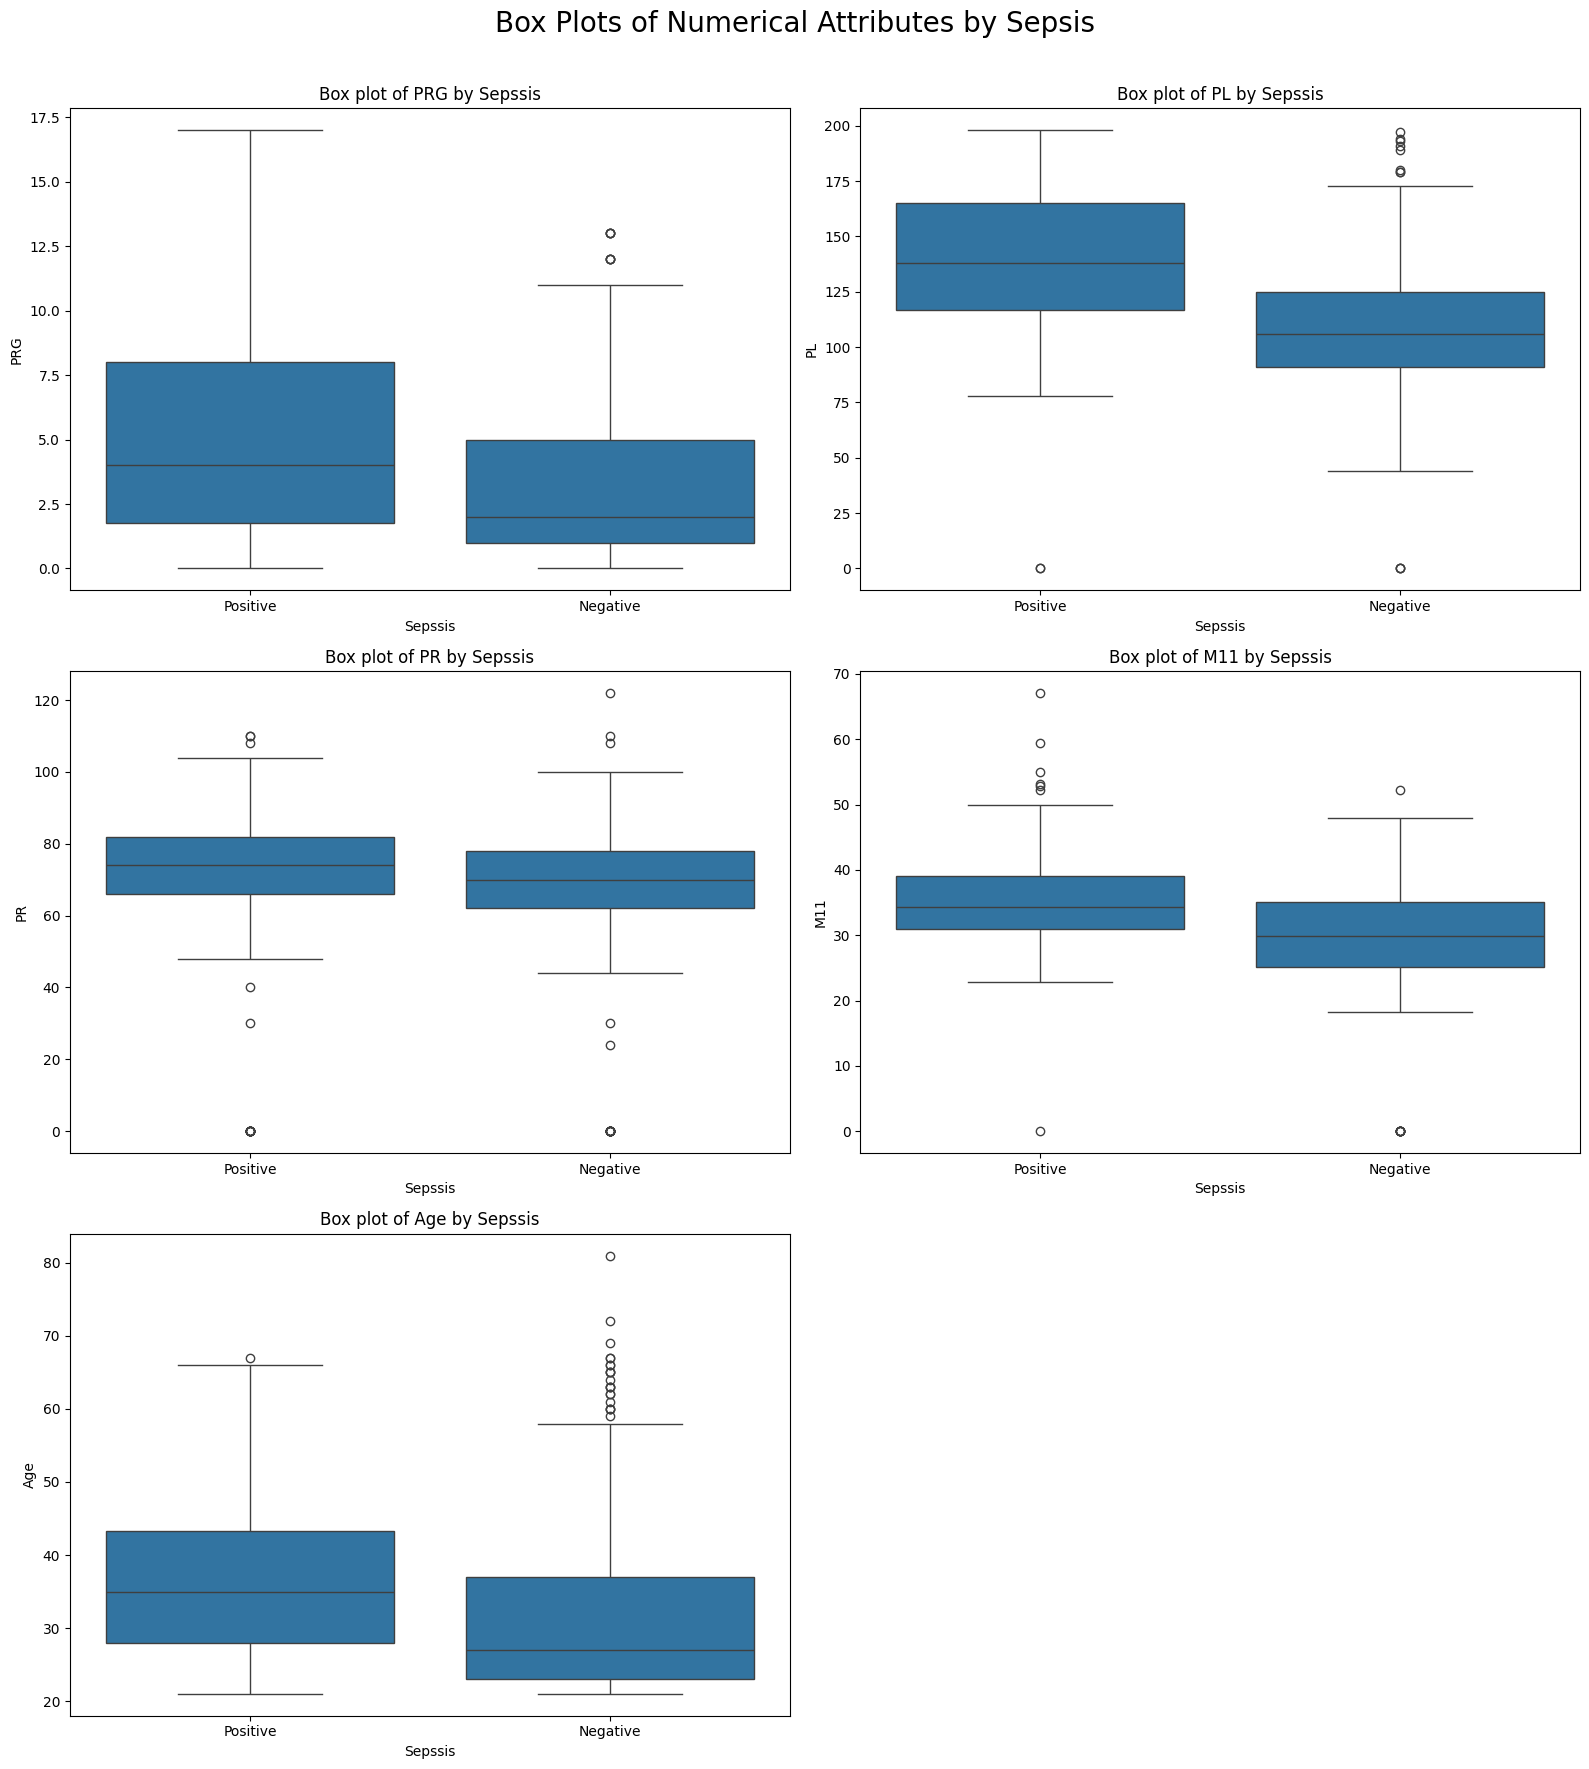

In [95]:
# List of columns for box plots
columns_by_sepsis = ['PRG', 'PL', 'PR', 'M11', 'Age']

# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16, 18))
fig.suptitle('Box Plots of Numerical Attributes by Sepsis', fontsize=20)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot box plots for each numerical attribute by Sepsis
for i, column in enumerate(columns_by_sepsis):
    sns.boxplot(x='Sepssis', y=column, data=train_df, ax=axes[i])
    axes[i].set_title(f'Box plot of {column} by Sepssis')
    axes[i].set_xlabel('Sepssis')
    axes[i].set_ylabel(column)

# Remove the empty subplot
fig.delaxes(axes[-1])

# Adjust the layout
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

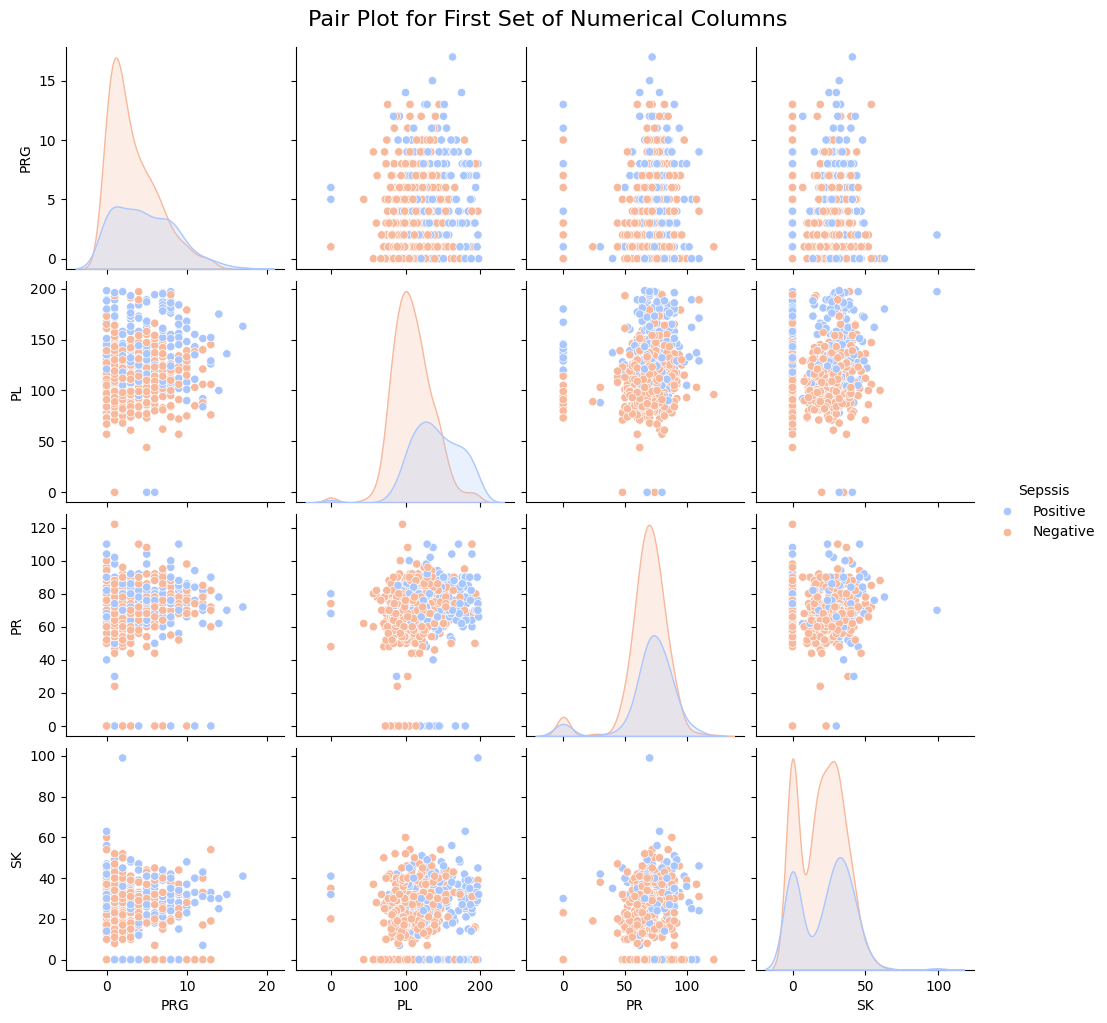

In [96]:
# First set of numerical columns
numerical_columns_set1 = ['PRG', 'PL', 'PR', 'SK']

# Pair plot for the first set
sns.pairplot(train_df[numerical_columns_set1 + ['Sepssis']], hue='Sepssis', palette='coolwarm', diag_kind='kde')
plt.suptitle('Pair Plot for First Set of Numerical Columns', y=1.02, fontsize=16)
plt.show()


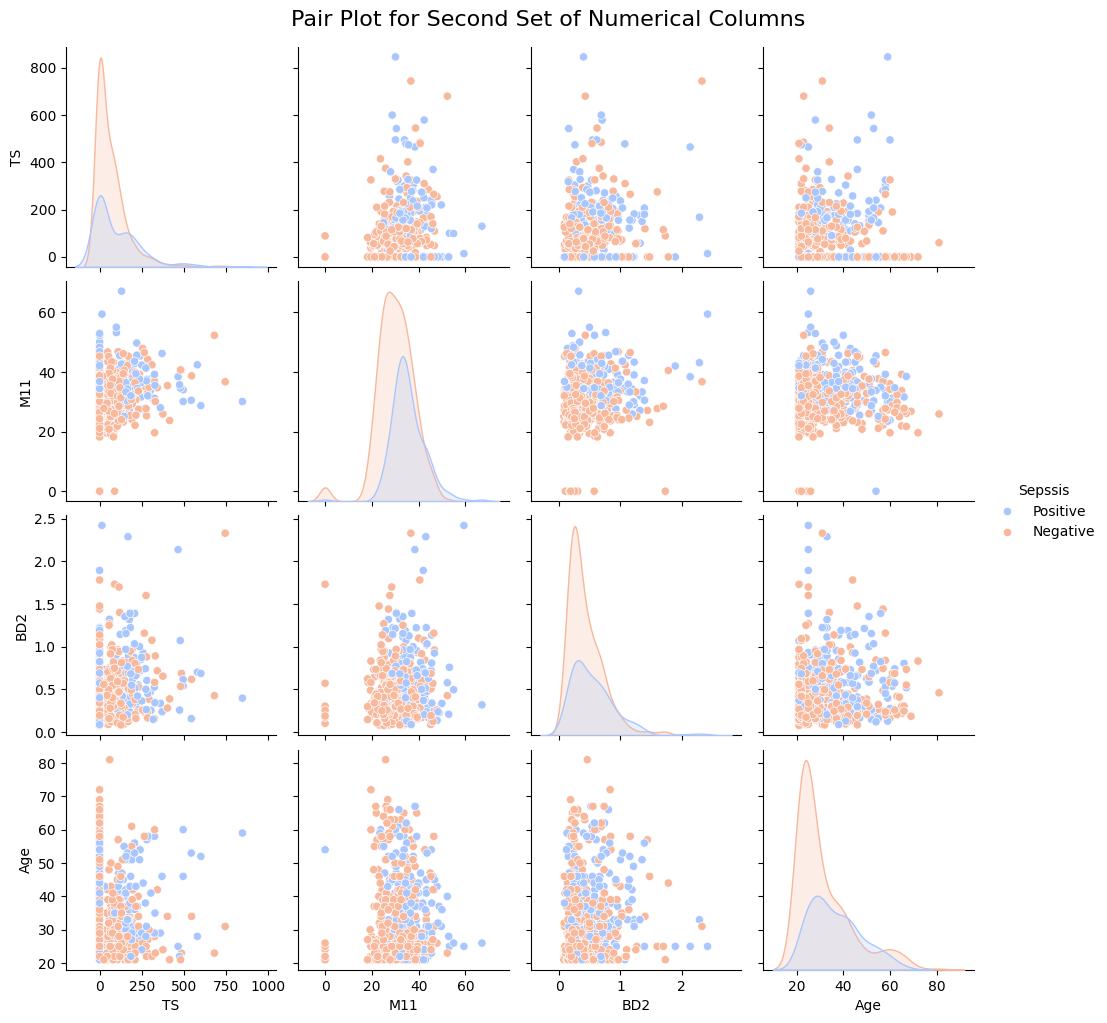

In [97]:
# Second set of numerical columns
numerical_columns_set2 = ['TS', 'M11', 'BD2', 'Age']

# Pair plot for the second set
sns.pairplot(train_df[numerical_columns_set2 + ['Sepssis']], hue='Sepssis', palette='coolwarm', diag_kind='kde')
plt.suptitle('Pair Plot for Second Set of Numerical Columns', y=1.02, fontsize=16)
plt.show()


### Multivariate Analysis

#### PCA Analysis





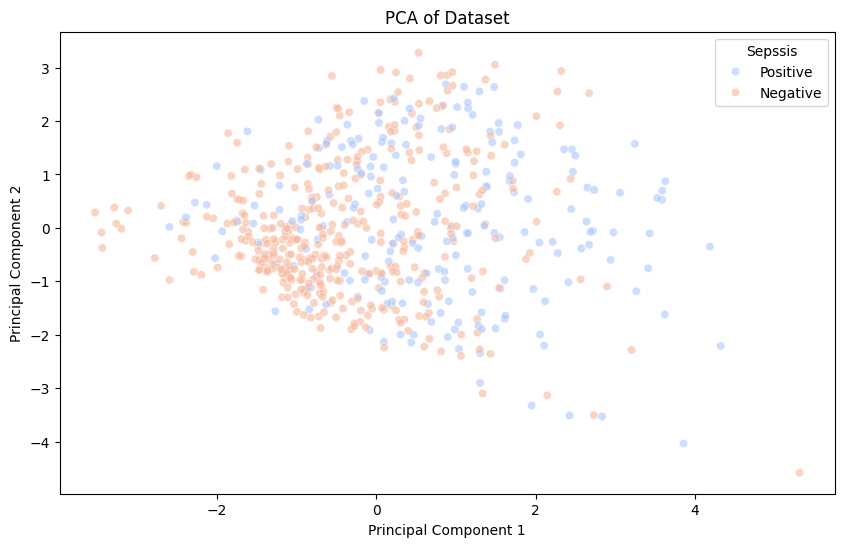

In [98]:
#make and use the copy of the dataframe
df_copy = train_df.copy()


# Define feature matrix X and target variable y
X = df_copy.drop(columns=['Sepssis', 'ID','M11','Insurance'])
y = df_copy['Sepssis']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


# Create a DataFrame with PCA results
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['Sepssis'] = y

# Plot the PCA results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Sepssis', data=pca_df, palette='coolwarm', alpha=0.6)
plt.title('PCA of Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Sepssis')
plt.show()


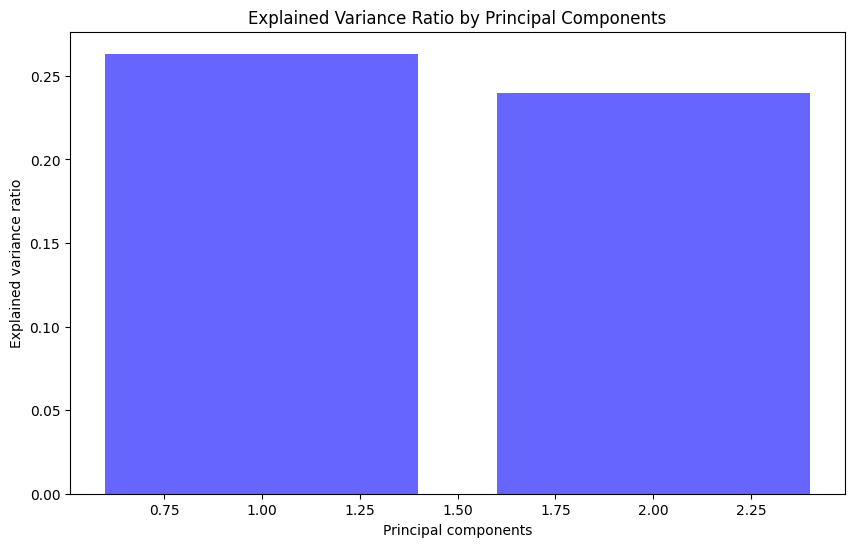

In [99]:
# Plot explained variance ratio
explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.6, color='b', align='center')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.title('Explained Variance Ratio by Principal Components')
plt.show()

#### 3D Scatter Plot

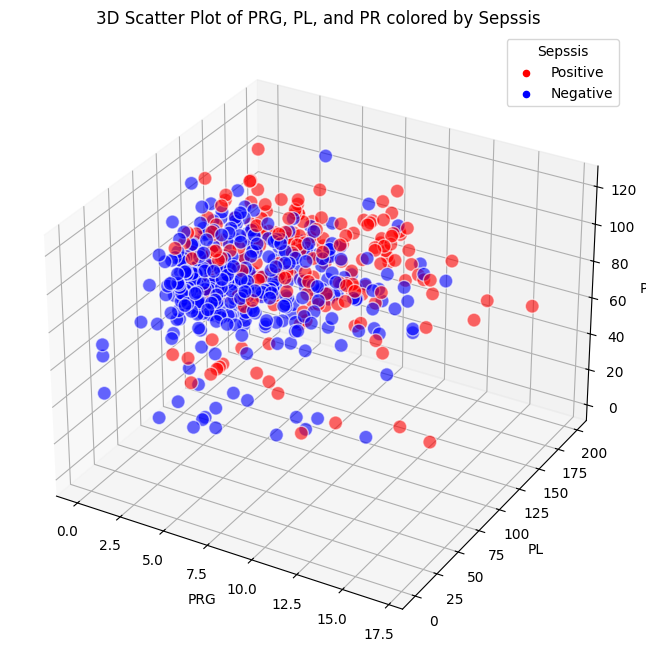

In [100]:
# Set up the figure and 3D axis
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Choose three numerical columns and the target column
x_col = 'PRG'
y_col = 'PL'
z_col = 'PR'
target_col = 'Sepssis'

# Map target variable to colors
colors = {'Positive': 'red', 'Negative': 'blue'}
ax.scatter(train_df[x_col], train_df[y_col], train_df[z_col], c=train_df[target_col].map(colors), alpha=0.6, edgecolors='w', s=100)

# Set axis labels and title
ax.set_xlabel(x_col)
ax.set_ylabel(y_col)
ax.set_zlabel(z_col)
ax.set_title(f'3D Scatter Plot of {x_col}, {y_col}, and {z_col} colored by {target_col}')

# Create a legend
for label in colors:
    ax.scatter([], [], [], color=colors[label], label=label)
ax.legend(title=target_col)

plt.show()


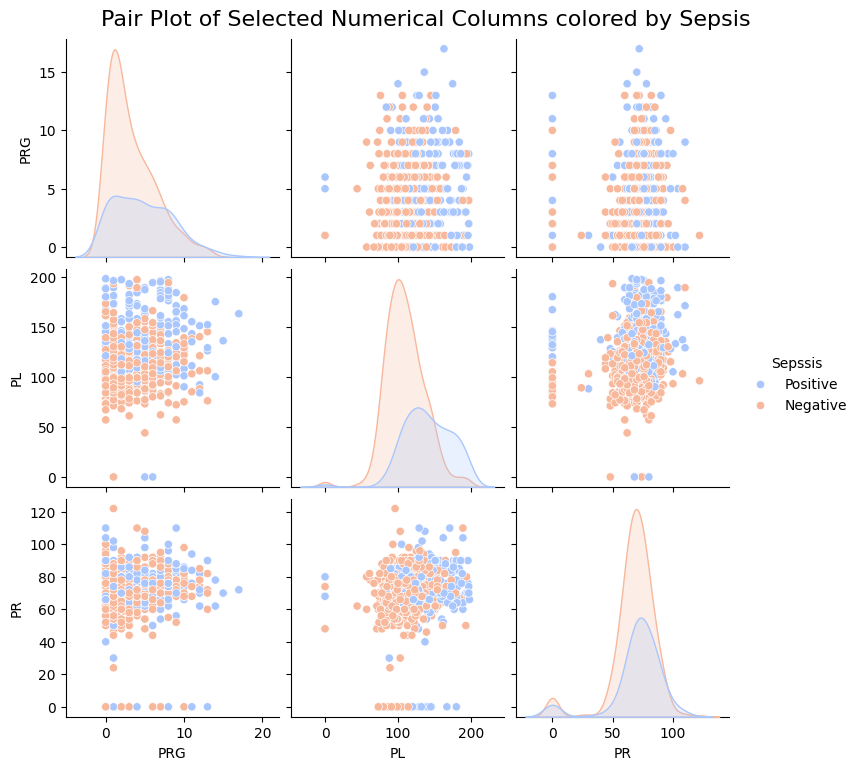

In [101]:

# Select three numerical columns and the target column
selected_columns = ['PRG', 'PL', 'PR', 'Sepssis']

# Pair plot with color coding by Sepsis
sns.pairplot(train_df[selected_columns], hue='Sepssis', palette='coolwarm', diag_kind='kde')

# Add a title
plt.suptitle('Pair Plot of Selected Numerical Columns colored by Sepsis', y=1.02, fontsize=16)
plt.show()


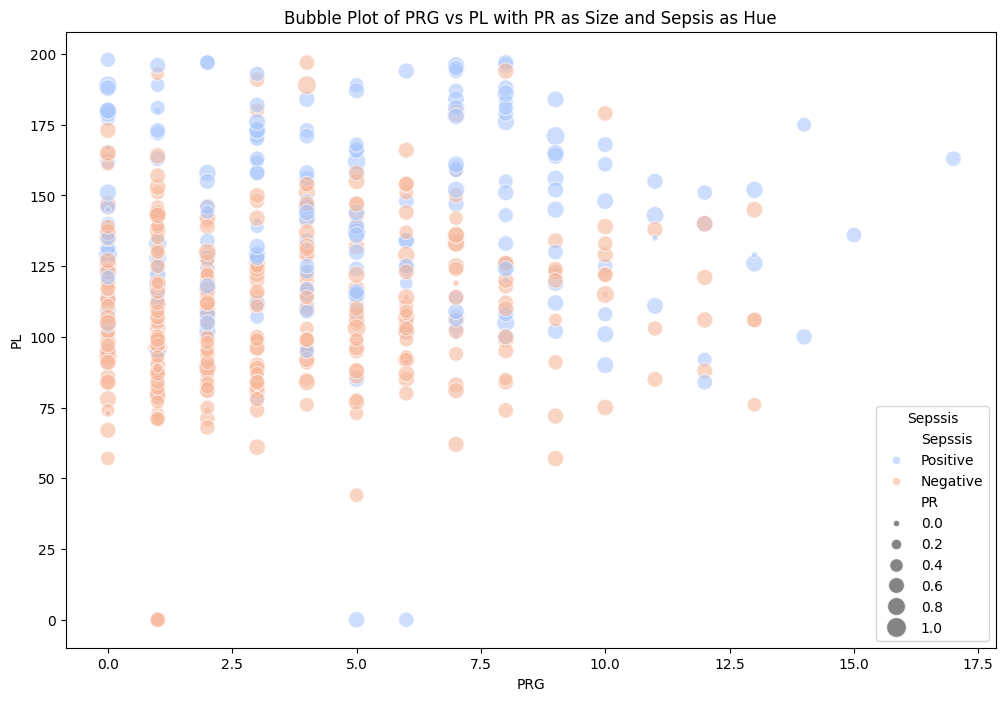

In [102]:
# Select three numerical columns
x_col = 'PRG'
y_col = 'PL'
size_col = 'PR'

# Normalize the size column for better visualization
size = (train_df[size_col] - train_df[size_col].min()) / (train_df[size_col].max() - train_df[size_col].min())

# Create the bubble plot
plt.figure(figsize=(12, 8))
sns.scatterplot(x=x_col, y=y_col, size=size, sizes=(20, 200), hue='Sepssis', data=train_df, alpha=0.6, palette='coolwarm')

# Set axis labels and title
plt.xlabel(x_col)
plt.ylabel(y_col)
plt.title(f'Bubble Plot of {x_col} vs {y_col} with {size_col} as Size and Sepsis as Hue')

# Show the plot
plt.legend(title='Sepssis')
plt.show()


## Data Preparation

### Handle Missing Values

In [103]:
# Check for missing values
train_df.isnull().sum()

ID           0
PRG          0
PL           0
PR           0
SK           0
TS           0
M11          0
BD2          0
Age          0
Insurance    0
Sepssis      0
dtype: int64

### Drop irrelevant columns

In [104]:
train_df = train_df.drop(columns=['ID', 'Insurance', 'M11'])

# Display the first few rows of the modified DataFrame to confirm the columns were dropped
train_df.head()

,PRG,PL,PR,SK,TS,BD2,Age,Sepssis
0,6,148,72,35,0,0.627,50,Positive
1,1,85,66,29,0,0.351,31,Negative
2,8,183,64,0,0,0.672,32,Positive
3,1,89,66,23,94,0.167,21,Negative
4,0,137,40,35,168,2.288,33,Positive


### Encode Categorical Variables

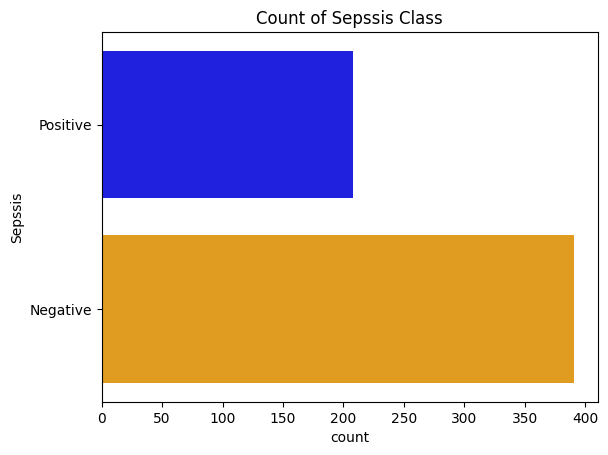

In [105]:
# countplot of target variable
sns.countplot(train_df["Sepssis"],palette=custom_palette)
plt.title("Count of Sepssis Class")
plt.show()

In [106]:
train_df.head()

,PRG,PL,PR,SK,TS,BD2,Age,Sepssis
0,6,148,72,35,0,0.627,50,Positive
1,1,85,66,29,0,0.351,31,Negative
2,8,183,64,0,0,0.672,32,Positive
3,1,89,66,23,94,0.167,21,Negative
4,0,137,40,35,168,2.288,33,Positive


In [107]:
train_df.columns

Index(['PRG', 'PL', 'PR', 'SK', 'TS', 'BD2', 'Age', 'Sepssis'], dtype='object')

### Normalize Numerical Variables

In [108]:
# Select numerical columns
numerical_columns = ['PRG', 'PL', 'PR', 'SK', 'TS', 'BD2', 'Age']

# Initialize the scaler
scaler = StandardScaler()

# Normalize the numerical columns
train_df[numerical_columns] = scaler.fit_transform(train_df[numerical_columns])
train_df.head()


,PRG,PL,PR,SK,TS,BD2,Age,Sepssis
0,0.647402,0.852744,0.169109,0.902098,-0.682191,0.432333,1.413836,Positive
1,-0.840679,-1.076512,-0.141457,0.527197,-0.682191,-0.386002,-0.193804,Negative
2,1.242635,1.924553,-0.244979,-1.284822,-0.682191,0.565757,-0.109191,Positive
3,-0.840679,-0.954020,-0.141457,0.152297,0.124823,-0.931558,-1.039930,Negative
4,-1.138295,0.515890,-1.487246,0.902098,0.760132,5.357163,-0.024579,Positive


### Split the Data into Training and Testing Sets

In [109]:
# Define the features (X) and the target (y)
X = train_df.drop(columns=['Sepssis'])
y = train_df['Sepssis']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print(f'Training set shape: X_train: {X_train.shape}, y_train: {y_train.shape}')
print(f'Testing set shape: X_test: {X_test.shape}, y_test: {y_test.shape}')


Training set shape: X_train: (479, 7), y_train: (479,)
Testing set shape: X_test: (120, 7), y_test: (120,)


## Modelling

In [110]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from imblearn.over_sampling import SMOTE

# Assume df_copy is your DataFrame
# df_copy = pd.read_csv('your_data.csv') # Uncomment and modify this line to load your data

# Convert labels to numerical values
label_mapping = {'Negative': 0, 'Positive': 1}
df_copy['Sepssis'] = df_copy['Sepssis'].map(label_mapping)

# Define features and target
X = df_copy.drop(['Sepssis', 'ID', 'M11', 'Insurance'], axis=1)
y = df_copy['Sepssis']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create polynomial features
poly = PolynomialFeatures(degree=2, interaction_only=True)
X_poly = poly.fit_transform(X_scaled)

# Address class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_poly, y)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Define the parameter grids
param_grids = {
    'RandomForest': {
        'n_estimators': [100, 200, 300, 400, 500],
        'max_depth': [None, 10, 20, 30, 40, 50],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'bootstrap': [True, False]
    },
    'SVM': {
        'C': [0.1, 1, 10, 100],
        'gamma': [1, 0.1, 0.01, 0.001],
        'kernel': ['rbf', 'poly', 'sigmoid']
    },
    'XGB': {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 4, 5]
    },
    'LGBM': {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'num_leaves': [31, 41, 51]
    }
}

# Initialize models
models = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'XGB': XGBClassifier(random_state=42),
    'LGBM': LGBMClassifier(random_state=42)
}

# Perform RandomizedSearchCV for each model
best_models = {}
for name, model in models.items():
    print(f"Performing RandomizedSearchCV for {name}...")
    grid_search = RandomizedSearchCV(estimator=model, param_distributions=param_grids[name], 
                                     n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1, scoring='roc_auc')
    grid_search.fit(X_train, y_train)
    best_models[name] = grid_search.best_estimator_
    print(f"Best parameters for {name}: {grid_search.best_params_}")
    print(f"Best ROC AUC for {name}: {grid_search.best_score_}")

# Now you have the best models stored in best_models dictionary


Performing RandomizedSearchCV for RandomForest...
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters for RandomForest: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 20, 'bootstrap': False}
Best ROC AUC for RandomForest: 0.8658849097030915
Performing RandomizedSearchCV for SVM...
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best parameters for SVM: {'kernel': 'rbf', 'gamma': 1, 'C': 10}
Best ROC AUC for SVM: 0.839843893480257
Performing RandomizedSearchCV for XGB...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters for XGB: {'n_estimators': 200, 'max_depth': 4, 'learning_rate': 0.1}
Best ROC AUC for XGB: 0.8396008570554025
Performing RandomizedSearchCV for LGBM...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
[LightGBM] [Info] Number of positive: 275, number of negative: 272
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.00

In [111]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc

# Initialize empty lists
accuracy_list = []
conf_matrix_list = []
class_report_list = []
roc_auc_list = []

# Evaluate each model
for name, model in best_models.items():
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred, output_dict=True)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    
    # Store results in lists
    accuracy_list.append({'Model': name, 'Accuracy': accuracy})
    conf_matrix_list.append({'Model': name, 'Confusion Matrix': conf_matrix})
    class_report_list.append({'Model': name, 'Classification Report': class_report})
    roc_auc_list.append({'Model': name, 'ROC AUC': roc_auc})

# Convert lists to DataFrames
accuracy_df = pd.DataFrame(accuracy_list)
conf_matrix_df = pd.DataFrame(conf_matrix_list)
class_report_df = pd.DataFrame(class_report_list)
roc_auc_df = pd.DataFrame(roc_auc_list)

# Merge accuracy and ROC AUC DataFrames for bar plots
metrics_df = pd.merge(accuracy_df, roc_auc_df, on='Model')

# Bar plot for Accuracy and ROC AUC
def plot_bar_metrics(metrics_df):
    fig, ax1 = plt.subplots(figsize=(12, 6))

    ax2 = ax1.twinx()
    width = 0.4

    metrics_df.set_index('Model', inplace=True)
    metrics_df['Accuracy'].plot(kind='bar', color='blue', ax=ax1, width=width, position=1)
    metrics_df['ROC AUC'].plot(kind='bar', color='red', ax=ax2, width=width, position=0)

    ax1.set_ylabel('Accuracy')
    ax2.set_ylabel('ROC AUC')
    plt.title('Model Accuracy and ROC AUC')
    ax1.set_xlabel('Models')
    plt.show()



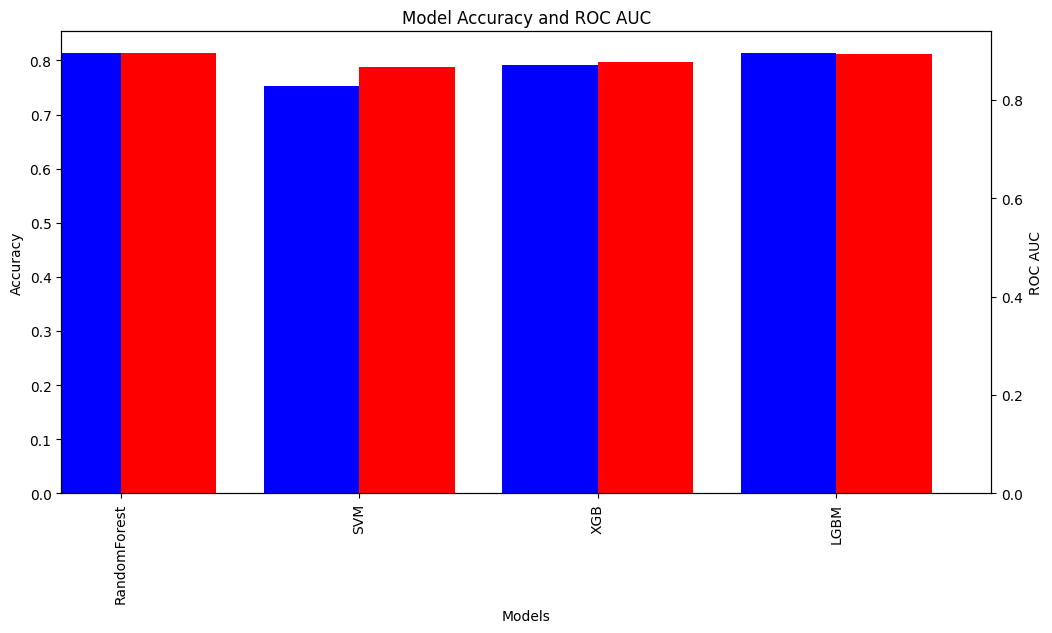

In [112]:
plot_bar_metrics(metrics_df)

# Function to plot confusion matrices
def plot_confusion_matrices(conf_matrix_df):
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    axes = axes.flatten()

    for ax, (index, row) in zip(axes, conf_matrix_df.iterrows()):
        sns.heatmap(row['Confusion Matrix'], annot=True, fmt='d', cmap='Blues', 
                    xticklabels=['Negative', 'Positive'], 
                    yticklabels=['Negative', 'Positive'], ax=ax)
        ax.set_title(f'Confusion Matrix - {row["Model"]}')
        ax.set_xlabel('Predicted Label')
        ax.set_ylabel('True Label')

    plt.tight_layout()
    plt.show()



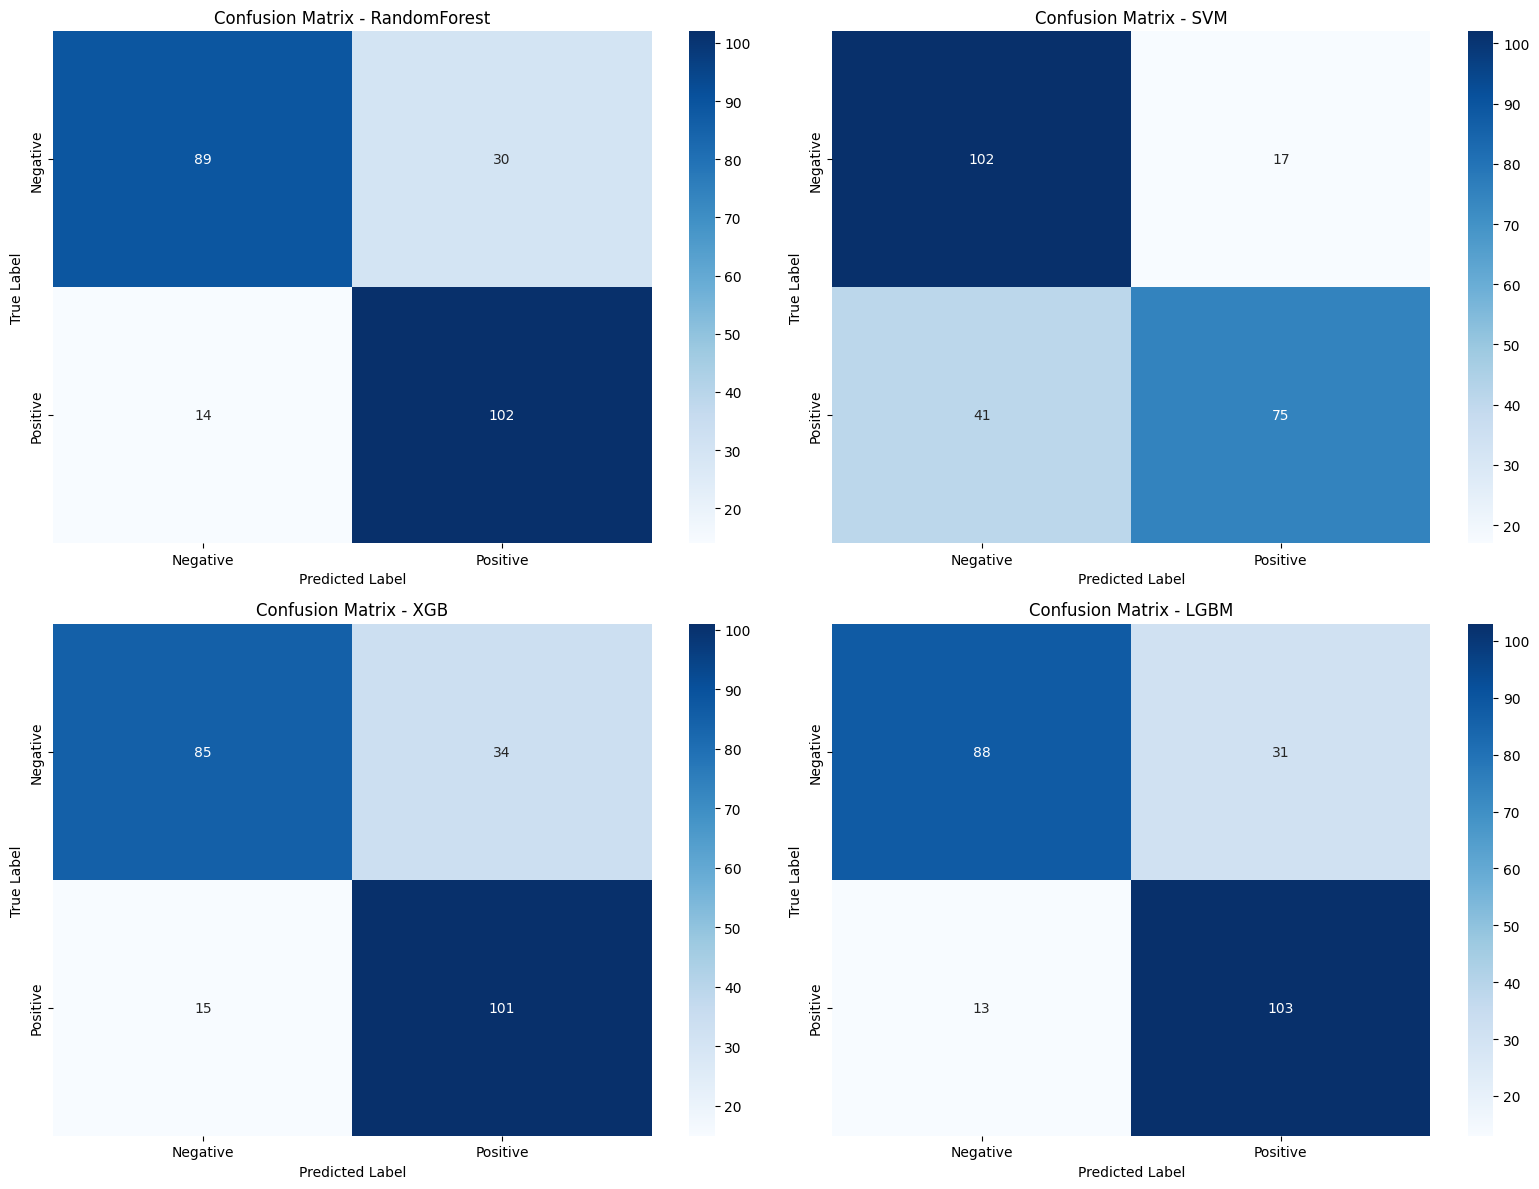

In [113]:
# Plot confusion matrices
plot_confusion_matrices(conf_matrix_df)

# Function to plot ROC curves
def plot_roc_curves(models, X_test, y_test):
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    axes = axes.flatten()

    for ax, (model_name, model) in zip(axes, models.items()):
        y_prob = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)
        
        ax.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
        ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        ax.set_xlim([0.0, 1.0])
        ax.set_ylim([0.0, 1.05])
        ax.set_xlabel('False Positive Rate')
        ax.set_ylabel('True Positive Rate')
        ax.set_title(f'ROC Curve - {model_name}')
        ax.legend(loc='lower right')

    plt.tight_layout()
    plt.show()



In [114]:
# Display classification reports in a tabular format
def display_classification_reports(class_report_df):
    for index, row in class_report_df.iterrows():
        print(f"Classification Report for {row['Model']}")
        print(pd.DataFrame(row['Classification Report']).transpose())
        print("\n")

display_classification_reports(class_report_df)


Classification Report for RandomForest
              precision    recall  f1-score     support
0              0.864078  0.747899  0.801802  119.000000
1              0.772727  0.879310  0.822581  116.000000
accuracy       0.812766  0.812766  0.812766    0.812766
macro avg      0.818402  0.813605  0.812191  235.000000
weighted avg   0.818986  0.812766  0.812059  235.000000


Classification Report for SVM
              precision    recall  f1-score     support
0              0.713287  0.857143  0.778626  119.000000
1              0.815217  0.646552  0.721154  116.000000
accuracy       0.753191  0.753191  0.753191    0.753191
macro avg      0.764252  0.751847  0.749890  235.000000
weighted avg   0.763601  0.753191  0.750257  235.000000


Classification Report for XGB
              precision    recall  f1-score     support
0              0.850000  0.714286  0.776256  119.000000
1              0.748148  0.870690  0.804781  116.000000
accuracy       0.791489  0.791489  0.791489    0.791489
m

In [115]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

# Initialize empty lists
accuracy_list = []
conf_matrix_list = []
class_report_list = []
roc_auc_list = []

# Evaluate each model
for name, model in best_models.items():
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred, output_dict=True)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    
    # Store results in lists
    accuracy_list.append({'Model': name, 'Accuracy': accuracy})
    conf_matrix_list.append({'Model': name, 'Confusion Matrix': conf_matrix})
    class_report_list.append({'Model': name, 'Classification Report': class_report})
    roc_auc_list.append({'Model': name, 'ROC AUC': roc_auc})

# Convert lists to DataFrames
accuracy_df = pd.DataFrame(accuracy_list)
conf_matrix_df = pd.DataFrame(conf_matrix_list)
class_report_df = pd.DataFrame(class_report_list)
roc_auc_df = pd.DataFrame(roc_auc_list)


In [116]:
accuracy_df

,Model,Accuracy
0,RandomForest,0.812766
1,SVM,0.753191
2,XGB,0.791489
3,LGBM,0.812766


In [117]:
conf_matrix_df

,Model,Confusion Matrix
0,RandomForest,"[[89, 30], [14, 102]]"
1,SVM,"[[102, 17], [41, 75]]"
2,XGB,"[[85, 34], [15, 101]]"
3,LGBM,"[[88, 31], [13, 103]]"


In [118]:
class_report_df

,Model,Classification Report
0,RandomForest,"{'0': {'precision': 0.8640776699029126, 'recal..."
1,SVM,"{'0': {'precision': 0.7132867132867133, 'recal..."
2,XGB,"{'0': {'precision': 0.85, 'recall': 0.71428571..."
3,LGBM,"{'0': {'precision': 0.8712871287128713, 'recal..."


In [119]:
roc_auc_df

,Model,ROC AUC
0,RandomForest,0.894886
1,SVM,0.868009
2,XGB,0.877210
3,LGBM,0.893002


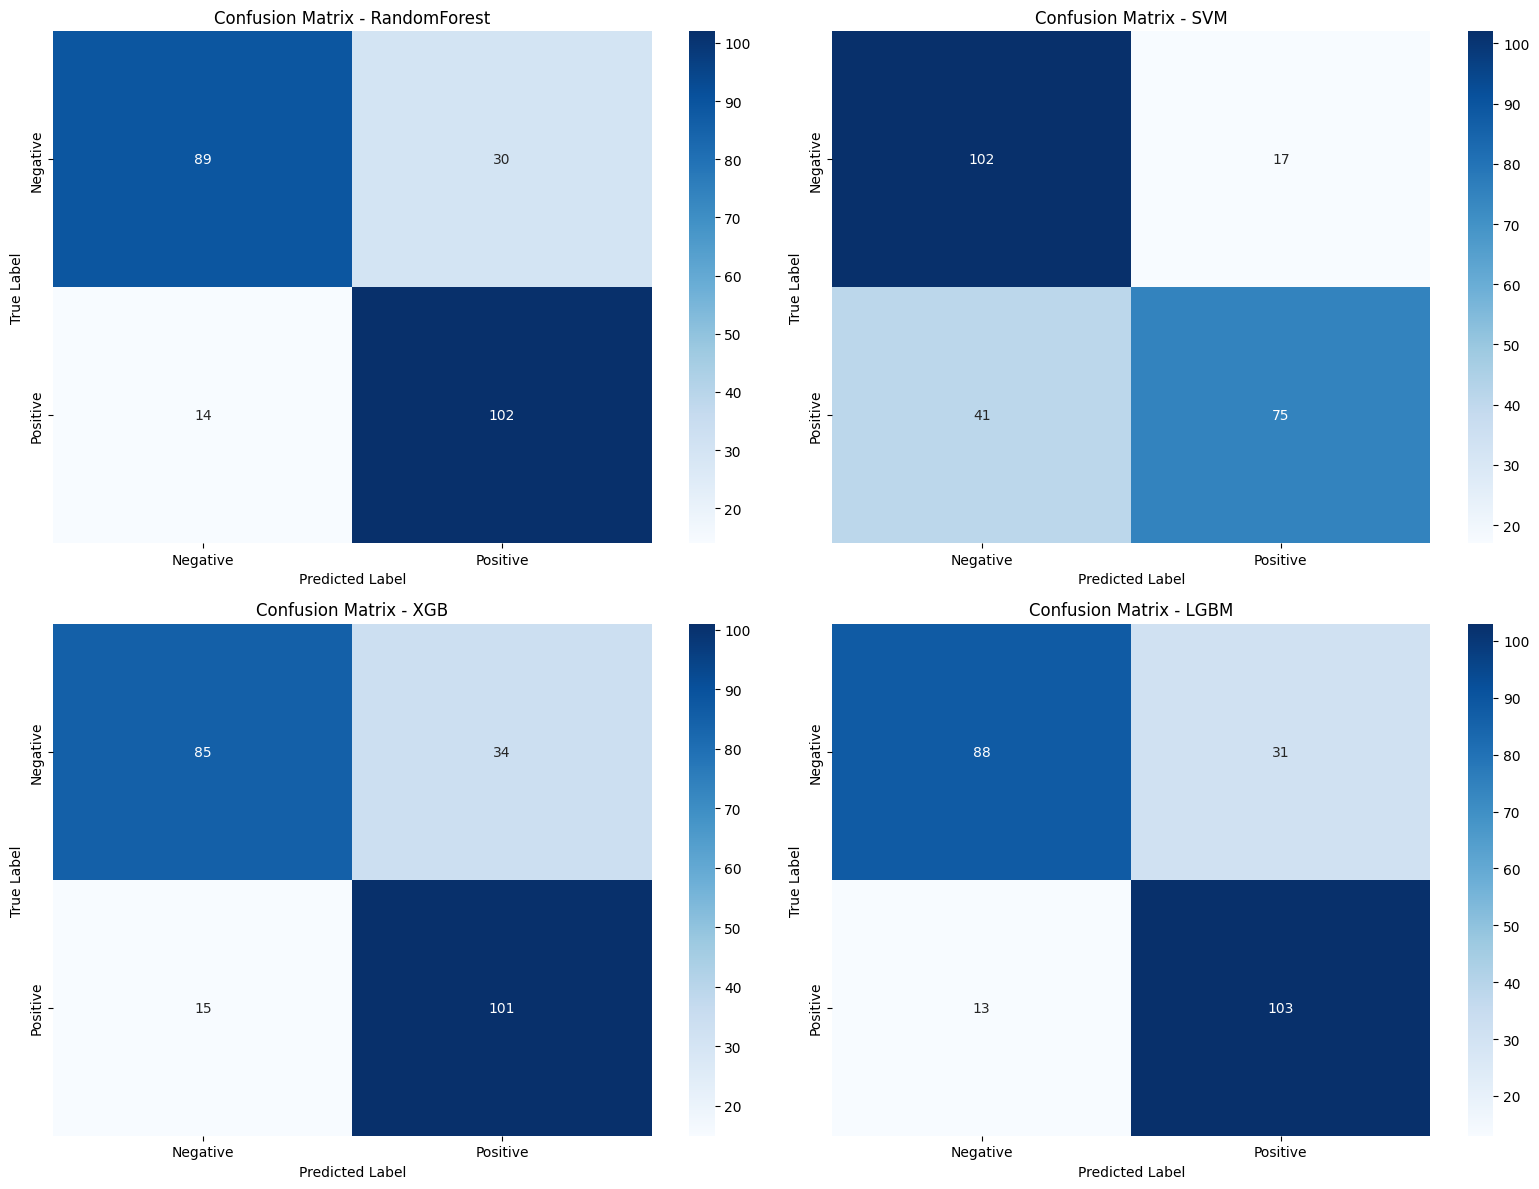

In [120]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrices(models, conf_matrices):
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    axes = axes.flatten()

    for ax, (model_name, cm) in zip(axes, zip(models, conf_matrices)):
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                    xticklabels=['Negative', 'Positive'], 
                    yticklabels=['Negative', 'Positive'], ax=ax)
        ax.set_title(f'Confusion Matrix - {model_name}')
        ax.set_xlabel('Predicted Label')
        ax.set_ylabel('True Label')
    
    plt.tight_layout()
    plt.show()

# Extract model names and confusion matrices
model_names = conf_matrix_df['Model']
conf_matrices = conf_matrix_df['Confusion Matrix']

# Plot confusion matrices
plot_confusion_matrices(model_names, conf_matrices)


Index(['Model', 'Accuracy', 'ROC AUC'], dtype='object')


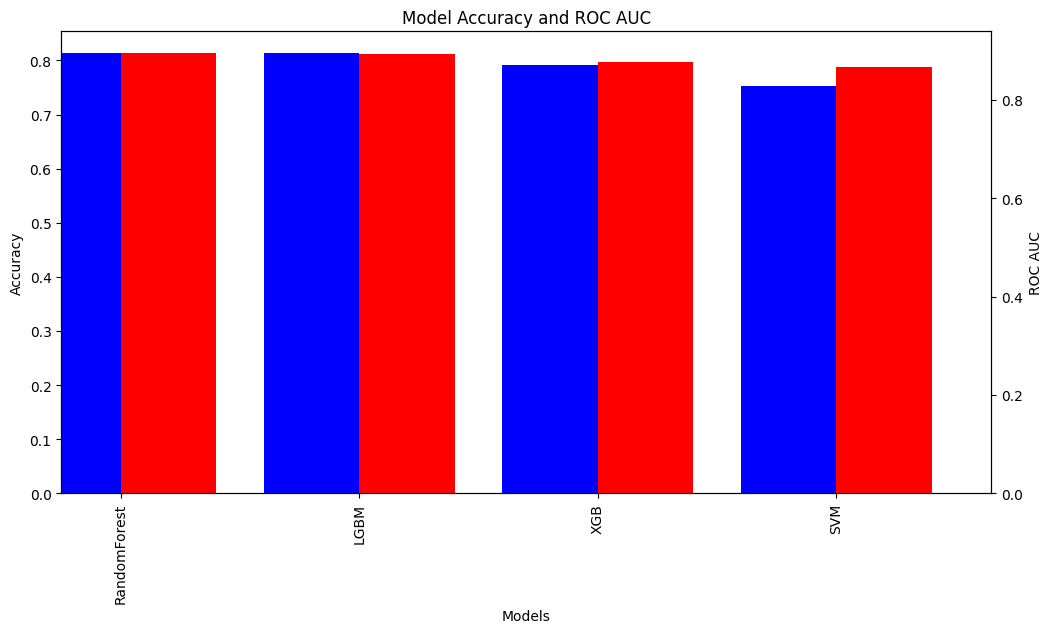

In [121]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc

# Initialize empty lists
accuracy_list = []
conf_matrix_list = []
class_report_list = []
roc_auc_list = []

# Evaluate each model
for name, model in best_models.items():
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred, output_dict=True)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    
    # Store results in lists
    accuracy_list.append({'Model': name, 'Accuracy': accuracy})
    conf_matrix_list.append({'Model': name, 'Confusion Matrix': conf_matrix})
    class_report_list.append({'Model': name, 'Classification Report': class_report})
    roc_auc_list.append({'Model': name, 'ROC AUC': roc_auc})

# Convert lists to DataFrames
accuracy_df = pd.DataFrame(accuracy_list)
conf_matrix_df = pd.DataFrame(conf_matrix_list)
class_report_df = pd.DataFrame(class_report_list)
roc_auc_df = pd.DataFrame(roc_auc_list)

# Merge accuracy and ROC AUC DataFrames for bar plots and evaluation
metrics_df = pd.merge(accuracy_df, roc_auc_df, on='Model')

# Sort by ROC AUC to get the top models
evaluation_df = metrics_df.sort_values(by='ROC AUC', ascending=False)

# Check the columns of evaluation_df
print(evaluation_df.columns)

# Bar plot for Accuracy and ROC AUC
def plot_bar_metrics(metrics_df):
    fig, ax1 = plt.subplots(figsize=(12, 6))

    ax2 = ax1.twinx()
    width = 0.4

    metrics_df.set_index('Model', inplace=True)
    metrics_df['Accuracy'].plot(kind='bar', color='blue', ax=ax1, width=width, position=1)
    metrics_df['ROC AUC'].plot(kind='bar', color='red', ax=ax2, width=width, position=0)

    ax1.set_ylabel('Accuracy')
    ax2.set_ylabel('ROC AUC')
    plt.title('Model Accuracy and ROC AUC')
    ax1.set_xlabel('Models')
    plt.show()

plot_bar_metrics(evaluation_df)

# Function to plot confusion matrices
def plot_confusion_matrices(conf_matrix_df):
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    axes = axes.flatten()

    for ax, (index, row) in zip(axes, conf_matrix_df.iterrows()):
        sns.heatmap(row['Confusion Matrix'], annot=True, fmt='d', cmap='Blues', 
                    xticklabels=['Negative', 'Positive'], 
                    yticklabels=['Negative', 'Positive'], ax=ax)
        ax.set_title(f'Confusion Matrix - {row["Model"]}')
        ax.set_xlabel('Predicted Label')
        ax.set_ylabel('True Label')

    plt.tight_layout()
    plt.show()

#


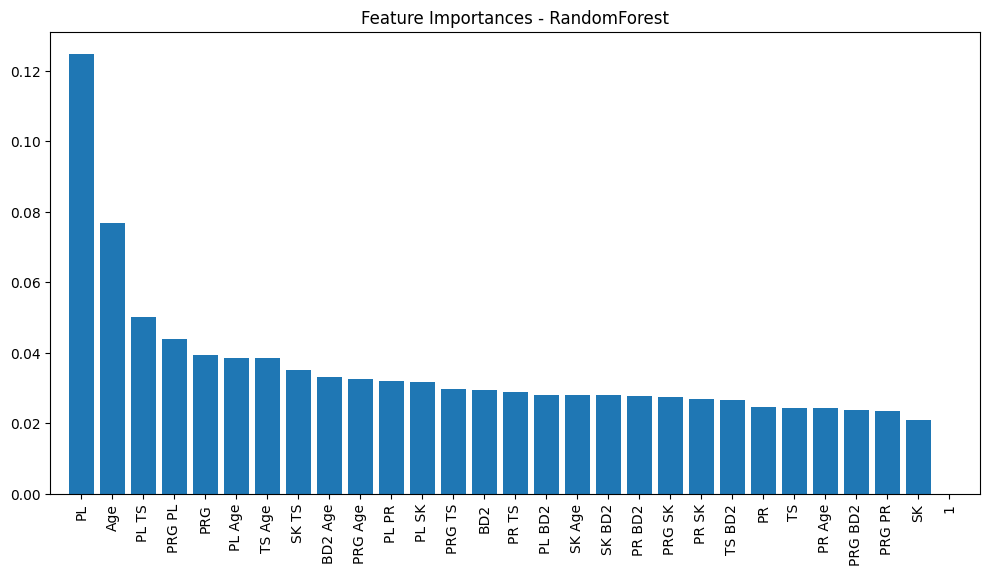

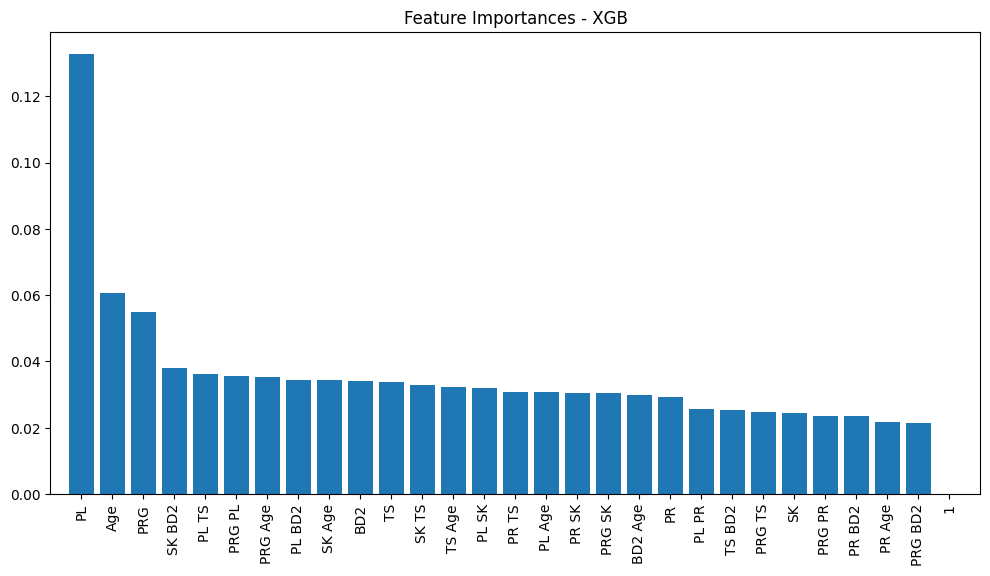

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Generate feature names for polynomial features
def get_feature_names(X, poly):
    return poly.get_feature_names_out(input_features=X.columns)

def plot_feature_importances(model, feature_names, model_name):
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
    elif hasattr(model, 'coef_'):
        importances = np.abs(model.coef_[0])  # For linear models, use absolute values of coefficients
    else:
        print(f"Model {model_name} does not support feature importances or coefficients.")
        return
    
    # Ensure that importances and feature_names have the same length
    if len(importances) != len(feature_names):
        print(f"Mismatch between number of importances ({len(importances)}) and feature names ({len(feature_names)})")
        return

    indices = np.argsort(importances)[::-1]
    plt.figure(figsize=(12, 6))
    plt.title(f'Feature Importances - {model_name}')
    plt.bar(range(len(importances)), importances[indices], align='center')
    plt.xticks(range(len(importances)), np.array(feature_names)[indices], rotation=90)
    plt.xlim([-1, len(importances)])
    plt.show()



# Apply the preprocessing steps and get feature names
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
poly = PolynomialFeatures(degree=2, interaction_only=True)
X_poly = poly.fit_transform(X_scaled)
feature_names_poly = get_feature_names(X, poly)

# Plot feature importances for models that support it
for name, model in best_models.items():
    if name in ['RandomForest', 'XGB']:
        plot_feature_importances(model, feature_names_poly, name)


In [123]:
import joblib
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

# Initialize empty lists for evaluation metrics
model_evaluations = []

# Evaluate each model
for name, model in best_models.items():
    # Predict on the test set
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred, output_dict=True)
    roc_auc = roc_auc_score(y_test, y_prob)
    
    # Store results in a dictionary
    model_evaluations.append({
        'Model': name,
        'Model_Object': model,
        'Accuracy': accuracy,
        'Confusion Matrix': conf_matrix,
        'Classification Report': class_report,
        'ROC AUC': roc_auc
    })

# Convert to DataFrame for easy sorting
evaluation_df = pd.DataFrame(model_evaluations)

# Sort models by ROC AUC
evaluation_df = evaluation_df.sort_values(by='ROC AUC', ascending=False)

# Display the sorted DataFrame
print(evaluation_df[['Model', 'ROC AUC']])


          Model   ROC AUC
0  RandomForest  0.894886
3          LGBM  0.893002
2           XGB  0.877210
1           SVM  0.868009


In [124]:
# Define the directory to save the models
model_save_dir = "../exports/models/"

# Save the top 3 models based on ROC AUC
for i in range(3):
    model_name = evaluation_df.iloc[i]['Model']
    model_object = evaluation_df.iloc[i]['Model_Object']
    model_path = f"{model_save_dir}{model_name}_best_model.pkl"
    
    # Save the model using joblib
    joblib.dump(model_object, model_path)
    print(f"Saved {model_name} to {model_path}")


Saved RandomForest to ../exports/models/RandomForest_best_model.pkl
Saved LGBM to ../exports/models/LGBM_best_model.pkl
Saved XGB to ../exports/models/XGB_best_model.pkl


## Deployment

Deployment will be done using streamlit and fast api in Docker